### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
from keras.datasets import fashion_mnist
(trainX,trainY),(testX,testY) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


#### Change train and test labels into one-hot vectors

In [0]:
trainY_hot = tf.keras.utils.to_categorical(trainY,num_classes=10)
testY_hot = tf.keras.utils.to_categorical(testY,num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(tf.keras.layers.Dense(200,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

In [0]:
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization())

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [0]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(trainX,trainY_hot,validation_data=(testX,testY_hot), epochs=10,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.5722 - acc: 0.7983 - val_loss: 0.4147 - val_acc: 0.8473
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4431 - acc: 0.8400 - val_loss: 0.3748 - val_acc: 0.8620
Epoch 3/10
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4071 - acc: 0.8538 - val_loss: 0.3748 - val_acc: 0.8674
Epoch 4/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3890 - acc: 0.8587 - val_loss: 0.3507 - val_acc: 0.8735
Epoch 5/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.3662 - acc: 0.8659 - val_loss: 0.3414 - val_acc: 0.8755
Epoch 6/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.3580 - acc: 0.8678 - val_loss: 0.3395 - val_acc: 0.8769
Epoch 7/10
60000/60000 [==============================] - 9s 154us/sample - loss: 0.3486 - acc: 0.8717 - va

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0

# Lets verify the model selectively
# We observed in cases of Coat, Pullover and Shirts the models is not able to diffentiate properly.

In [0]:
class_names = [' T-shirt','Trouse','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
import numpy as np
predictions = model.predict(trainX)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
# Checking on  predicted_label = np.argmax(predictions_array)

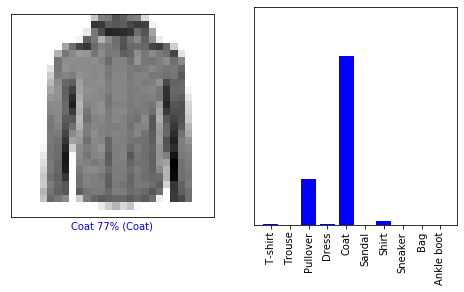

In [96]:
#Replace value of i with other index to check other product
i = 58068
color='blue'
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i],trainY, trainX)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], trainY)
plt.show()